In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
# Importing and reading cleandata outputs

crime_master_csv = "cleandata_output/Police_Master.csv"
crime_master_2020_csv = "cleandata_output/Police_Master_2020.csv"

parcel_master_csv = "cleandata_output/Parcel_Master.csv"
parcel_master_2020_csv = "cleandata_output/Parcel_Master_2020.csv"

census_master_csv = "cleandata_output/Census_Master.csv"

#Read MPLS Police Data into DF
crime_df = pd.read_csv(crime_master_csv)
crime_2020_df = pd.read_csv(crime_master_2020_csv)
parcel_df = pd.read_csv(parcel_master_csv)
parcel_2020_df = pd.read_csv(parcel_master_2020_csv)
census_df = pd.read_csv(census_master_csv)

In [3]:
#Michael Start

In [4]:
#Michael End

In [5]:
#Emilio Start

In [6]:
crime_by_nbh = crime_df[['NEIGHBORHOOD', 'OFFENSE']].groupby(['NEIGHBORHOOD']).count()
parcel_by_nbh = parcel_df[['NEIGHBORHOOD', 'TOTALVALUE']].groupby(['NEIGHBORHOOD']).median()

In [7]:
parcel_by_nbh.count()

TOTALVALUE    83
dtype: int64

In [8]:
crime_by_nbh.count() ### Investigate which neighborhood were excluded and why

OFFENSE    83
dtype: int64

In [9]:
housing_crime = pd.merge(parcel_by_nbh, crime_by_nbh, on='NEIGHBORHOOD', how='left')
housing_crime['OFFENSE'].isnull().sum()

0

In [10]:
housing_crime.loc[housing_crime['OFFENSE'].isnull() == True]

,TOTALVALUE,OFFENSE
NEIGHBORHOOD,,


In [11]:
#Plotting

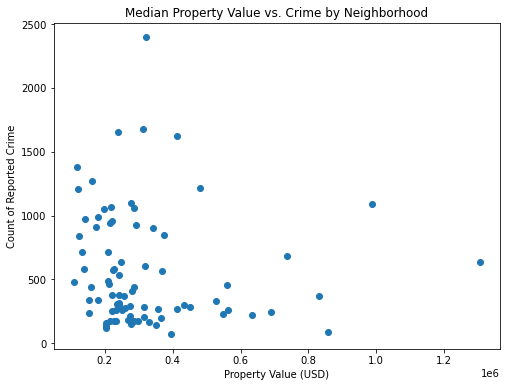

In [12]:
x_values = housing_crime['TOTALVALUE']
y_values = housing_crime['OFFENSE']

plt.figure(figsize=(8,6))
plt.scatter(x_values, y_values)
plt.xlabel('Property Value (USD)')
plt.ylabel('Count of Reported Crime')
plt.title('Median Property Value vs. Crime by Neighborhood')
plt.show()

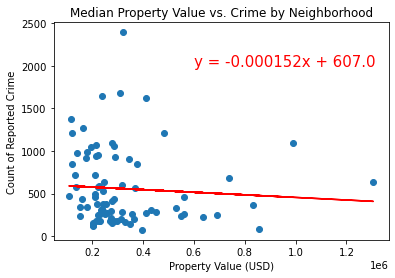

The correlation coefficient value r is -0.06912339740116881
r-squared is 0.004778044068279911
y = -0.000152x + 607.0


In [13]:
# Correlation and Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values) 
# calculating the fit
regress_values = x_values * slope + intercept
# text holding the line equation:
equation = f'y = {round(slope, 6)}x + {round(intercept)}'
plt.scatter(x_values, y_values)
plt.annotate(equation, (600000,2000), fontsize=15, color='red')
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Property Value (USD)')
plt.ylabel('Count of Reported Crime')
plt.title('Median Property Value vs. Crime by Neighborhood')
plt.show()
print(f'The correlation coefficient value r is {rvalue}')
print(f'r-squared is {rvalue**2}')
print(equation)

In [14]:
crime_df.head()

,Unnamed: 0,NEIGHBORHOOD,OFFENSE,DESCRIPTION,UCRCode_x,YEAR,MONTH,UCRCode_y,CATEGORY
0,0,HAWTHORNE,AUTOTH,Motor Vehicle Theft,8,2017,8,8,Non-Violent
1,1,FOLWELL,THEFT,Other Theft,7,2017,8,7,Non-Violent
2,2,JORDAN,ROBPAG,Robbery Per Agg,4,2017,8,4,Violent
3,3,EAST PHILLIPS,SHOPLF,Shoplifting,7,2017,8,7,Non-Violent
4,4,WILLARD-HAY,THEFT,Other Theft,7,2017,8,7,Non-Violent


In [15]:
# exploring seasonality:
crime_monthly = crime_df.groupby(['MONTH'])['OFFENSE'].count()
crime_monthly_2020 = crime_2020_df.groupby(['MONTH'])['OFFENSE'].count()

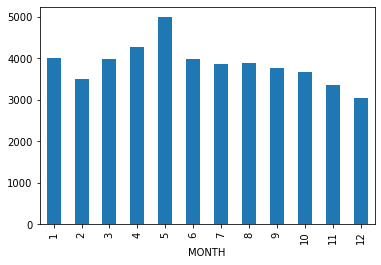

In [16]:
crime_season_plot = crime_monthly.plot(kind='bar', x='MONTH', y='OFFENSE')

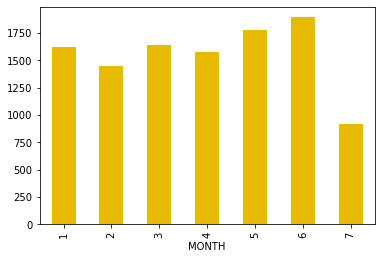

In [17]:
crime_season_2020_plot = crime_monthly_2020.plot(kind='bar', x='MONTH', y='OFFENSE', color='#E8BA02')

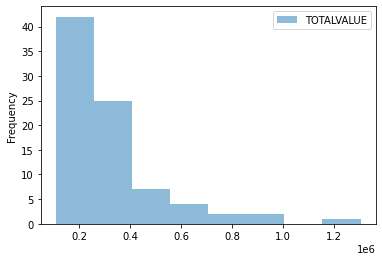

In [18]:
parcel_by_nbh.plot.hist(bins=8, alpha=0.5) # tell story about our data with this.
# it is positively skewed (or skeweed to the right)

In [19]:
# x_med_values = parcel_by_nbh.index.tolist()
# nbh_median_plot = parcel_by_nbh.plot(kind='bar', x=x_med_values, figsize=(20,15), 
#                                   title='Housing Value Median by Neighborhood')

In [20]:
# stats.ttest_ind(population1.vertebrae, population2.vertebrae, equal_var=False)

In [21]:
#Emilio End

In [22]:
#Matt Start

# ALL YEARS (2017-2019) DATAFRAME

In [23]:
# Find Median Home price by Neighborhood
parcel_median = parcel_df.groupby(["NEIGHBORHOOD"])["TOTALVALUE"].median()

# Find Total Crime by Neighborhood
total_crime = crime_df[["NEIGHBORHOOD", "YEAR"]].groupby(["NEIGHBORHOOD"]).count()

# Find violent crime numbers
crime_breakdown_violent = crime_df.loc[crime_df["CATEGORY"] == "Violent"]
crime_breakdown_violent = crime_breakdown_violent[["NEIGHBORHOOD", "YEAR"]].groupby(["NEIGHBORHOOD"]).count()

# Find non-violent crime numbers
crime_breakdown_nonviolent = crime_df.loc[crime_df["CATEGORY"] == "Non-Violent"]
crime_breakdown_nonviolent = crime_breakdown_nonviolent[["NEIGHBORHOOD", "YEAR"]].groupby(["NEIGHBORHOOD"]).count()

# Merge all crime data with median home price - rename violent/non-violent
nbh_crime_all = pd.merge(parcel_median, total_crime, on="NEIGHBORHOOD", how='left')
nbh_crime_violent = pd.merge(parcel_median, crime_breakdown_violent, on="NEIGHBORHOOD", how='left')
nbh_crime_nonviolent = pd.merge(parcel_median, crime_breakdown_nonviolent, on="NEIGHBORHOOD", how='left')

medhome_crime = pd.merge(total_crime, nbh_crime_violent, on=["NEIGHBORHOOD"], how='left')
medhome_crime = pd.merge(medhome_crime, nbh_crime_nonviolent, on=["NEIGHBORHOOD", "TOTALVALUE"], how='left')

medhome_crime = medhome_crime.rename(columns={"TOTALVALUE": "Median Home Value", "YEAR_x": "Total Crime", "YEAR_y": "Violent Crime", "YEAR": "Non-Violent Crime"})
medhome_crime = medhome_crime[["Median Home Value", "Total Crime", "Violent Crime", "Non-Violent Crime"]]

# Add population
medhome_crime = pd.merge(medhome_crime, census_df, on="NEIGHBORHOOD", how='left')

# Find Crime Rates
total_crime_rate = (medhome_crime["Total Crime"] / (medhome_crime["Total Population"] / 100)).round(2)
violent_crime_rate = (medhome_crime["Violent Crime"] / (medhome_crime["Total Population"] / 100)).round(2)
nonviolent_crime_rate = (medhome_crime["Non-Violent Crime"] / (medhome_crime["Total Population"] / 100)).round(2)

#Add crime rates to dataframe
medhome_crime["Crime Rate (Total)"] = total_crime_rate
medhome_crime["Violent Crime Rate"] = violent_crime_rate
medhome_crime["Non-Violent Crime Rate"] = nonviolent_crime_rate

#Re-arrange columns
medhome_crime = medhome_crime[["NEIGHBORHOOD",
                               "Median Home Value", 
                               "Total Crime", 
                               "Violent Crime", 
                               "Non-Violent Crime",
                               "Crime Rate (Total)",
                               "Violent Crime Rate",
                               "Non-Violent Crime Rate",
                               "Total Population"]]

#Save to CSV
medhome_crime.to_csv('cleandata_output/medhome_crime.csv')

medhome_crime

,NEIGHBORHOOD,Median Home Value,Total Crime,Violent Crime,Non-Violent Crime,Crime Rate (Total),Violent Crime Rate,Non-Violent Crime Rate,Total Population
0,ARMATAGE,315000,207,12,195,4.23,0.25,3.98,4895
1,AUDUBON PARK,242000,375,38,337,7.56,0.77,6.79,4962
2,BANCROFT,240500,315,29,286,9.34,0.86,8.48,3371
3,BELTRAMI,204000,135,21,114,10.82,1.68,9.13,1248
4,BOTTINEAU,216250,173,26,147,10.45,1.57,8.88,1656
...,...,...,...,...,...,...,...,...,...
78,WEST CALHOUN,634500,219,17,202,12.59,0.98,11.61,1740
79,WHITTIER,322500,2395,378,2017,17.50,2.76,14.73,13689
80,WILLARD-HAY,142000,976,352,624,11.33,4.09,7.25,8611
81,WINDOM,280000,409,42,367,8.21,0.84,7.37,4980


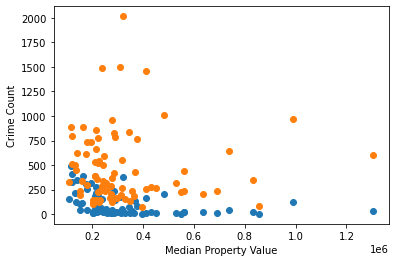

In [24]:
medianhomevalue = medhome_crime.iloc[:,1]
total_violent_crime = medhome_crime.iloc[:,3]
total_nonviolent_crime = medhome_crime.iloc[:,4]
plt.scatter(medianhomevalue,total_violent_crime)
plt.scatter(medianhomevalue,total_nonviolent_crime)
# plt.xticks(medianhomevalue, rotation=90)
plt.xlabel('Median Property Value')
plt.ylabel('Crime Count')
plt.title('')
plt.show()

# YEARLY DATAFRAMES

In [25]:
##### 2019 #####
parcel_df_2019 = parcel_df.loc[parcel_df["ASSESSMENT_YEAR"] == 2019]
crime_df_2019 = crime_df.loc[crime_df["YEAR"] == 2019]

# Find Median Home price by Neighborhood
parcel_median_2019 = parcel_df_2019.groupby(["NEIGHBORHOOD"])["TOTALVALUE"].median()

# Find Total Crime by Neighborhood
total_crime_2019 = crime_df_2019[["NEIGHBORHOOD", "YEAR"]].groupby(["NEIGHBORHOOD"]).count()

# Find violent crime numbers
crime_breakdown_violent_2019 = crime_df_2019.loc[crime_df["CATEGORY"] == "Violent"]
crime_breakdown_violent_2019 = crime_breakdown_violent_2019[["NEIGHBORHOOD", "YEAR"]].groupby(["NEIGHBORHOOD"]).count()

# Find non-violent crime numbers
crime_breakdown_nonviolent_2019 = crime_df_2019.loc[crime_df["CATEGORY"] == "Non-Violent"]
crime_breakdown_nonviolent_2019 = crime_breakdown_nonviolent_2019[["NEIGHBORHOOD", "YEAR"]].groupby(["NEIGHBORHOOD"]).count()

# Merge all crime data with median home price - rename violent/non-violent
nbh_crime_2019 = pd.merge(parcel_median_2019, total_crime_2019, on="NEIGHBORHOOD", how='left')
nbh_crime_violent_2019 = pd.merge(parcel_median_2019, crime_breakdown_violent_2019, on="NEIGHBORHOOD", how='left')
nbh_crime_nonviolent_2019 = pd.merge(parcel_median_2019, crime_breakdown_nonviolent_2019, on="NEIGHBORHOOD", how='left')

medhome_crime_2019 = pd.merge(total_crime_2019, nbh_crime_violent_2019, on=["NEIGHBORHOOD"], how='left')
medhome_crime_2019 = pd.merge(medhome_crime_2019, nbh_crime_nonviolent_2019, on=["NEIGHBORHOOD", "TOTALVALUE"], how='left')

medhome_crime_2019 = medhome_crime_2019.rename(columns={"TOTALVALUE": "Median Home Value", "YEAR_x": "Total Crime", "YEAR_y": "Violent Crime", "YEAR": "Non-Violent Crime"})
medhome_crime_2019 = medhome_crime_2019[["Median Home Value", "Total Crime", "Violent Crime", "Non-Violent Crime"]]

# Add population
medhome_crime_2019 = pd.merge(medhome_crime_2019, census_df, on="NEIGHBORHOOD", how='left')

# Find Crime Rates
total_crime_rate_2019 = (medhome_crime_2019["Total Crime"] / (medhome_crime_2019["Total Population"] / 100)).round(2)
violent_crime_rate_2019 = (medhome_crime_2019["Violent Crime"] / (medhome_crime_2019["Total Population"] / 100)).round(2)
nonviolent_crime_rate_2019 = (medhome_crime_2019["Non-Violent Crime"] / (medhome_crime_2019["Total Population"] / 100)).round(2)

#Add crime rates to dataframe
medhome_crime_2019["Crime Rate (Total)"] = total_crime_rate_2019
medhome_crime_2019["Violent Crime Rate"] = violent_crime_rate_2019
medhome_crime_2019["Non-Violent Crime Rate"] = nonviolent_crime_rate_2019

#Re-arrange columns
medhome_crime_2019 = medhome_crime_2019[["NEIGHBORHOOD",
                               "Median Home Value", 
                               "Total Crime", 
                               "Violent Crime", 
                               "Non-Violent Crime",
                               "Crime Rate (Total)",
                               "Violent Crime Rate",
                               "Non-Violent Crime Rate",
                               "Total Population"]]

#Save to CSV
medhome_crime_2019.to_csv('cleandata_output/medhome_crime_2019.csv')\

medhome_crime_2019

,NEIGHBORHOOD,Median Home Value,Total Crime,Violent Crime,Non-Violent Crime,Crime Rate (Total),Violent Crime Rate,Non-Violent Crime Rate,Total Population
0,ARMATAGE,343500.0,74,8.0,66.0,1.51,0.16,1.35,4895
1,AUDUBON PARK,265000.0,142,22.0,120.0,2.86,0.44,2.42,4962
2,BANCROFT,261000.0,148,10.0,138.0,4.39,0.30,4.09,3371
3,BELTRAMI,222250.0,65,8.0,57.0,5.21,0.64,4.57,1248
4,BOTTINEAU,238500.0,87,10.0,77.0,5.25,0.60,4.65,1656
...,...,...,...,...,...,...,...,...,...
78,WEST CALHOUN,657250.0,87,9.0,78.0,5.00,0.52,4.48,1740
79,WHITTIER,353000.0,1179,166.0,1013.0,8.61,1.21,7.40,13689
80,WILLARD-HAY,160000.0,368,146.0,222.0,4.27,1.70,2.58,8611
81,WINDOM,301000.0,190,22.0,168.0,3.82,0.44,3.37,4980


In [26]:
##### 2018 #####
parcel_df_2018 = parcel_df.loc[parcel_df["ASSESSMENT_YEAR"] == 2018]
crime_df_2018 = crime_df.loc[crime_df["YEAR"] == 2018]

# Find Median Home price by Neighborhood
parcel_median_2018 = parcel_df_2018.groupby(["NEIGHBORHOOD"])["TOTALVALUE"].median()

# Find Total Crime by Neighborhood
total_crime_2018 = crime_df_2018[["NEIGHBORHOOD", "YEAR"]].groupby(["NEIGHBORHOOD"]).count()

# Find violent crime numbers
crime_breakdown_violent_2018 = crime_df_2018.loc[crime_df["CATEGORY"] == "Violent"]
crime_breakdown_violent_2018 = crime_breakdown_violent_2018[["NEIGHBORHOOD", "YEAR"]].groupby(["NEIGHBORHOOD"]).count()

# Find non-violent crime numbers
crime_breakdown_nonviolent_2018 = crime_df_2018.loc[crime_df["CATEGORY"] == "Non-Violent"]
crime_breakdown_nonviolent_2018 = crime_breakdown_nonviolent_2018[["NEIGHBORHOOD", "YEAR"]].groupby(["NEIGHBORHOOD"]).count()

# Merge all crime data with median home price - rename violent/non-violent
nbh_crime_2018 = pd.merge(parcel_median_2018, total_crime_2018, on="NEIGHBORHOOD", how='left')
nbh_crime_violent_2018 = pd.merge(parcel_median_2018, crime_breakdown_violent_2018, on="NEIGHBORHOOD", how='left')
nbh_crime_nonviolent_2018 = pd.merge(parcel_median_2018, crime_breakdown_nonviolent_2018, on="NEIGHBORHOOD", how='left')

medhome_crime_2018 = pd.merge(total_crime_2018, nbh_crime_violent_2018, on=["NEIGHBORHOOD"], how='left')
medhome_crime_2018 = pd.merge(medhome_crime_2018, nbh_crime_nonviolent_2018, on=["NEIGHBORHOOD", "TOTALVALUE"], how='left')

medhome_crime_2018 = medhome_crime_2018.rename(columns={"TOTALVALUE": "Median Home Value", "YEAR_x": "Total Crime", "YEAR_y": "Violent Crime", "YEAR": "Non-Violent Crime"})
medhome_crime_2018 = medhome_crime_2018[["Median Home Value", "Total Crime", "Violent Crime", "Non-Violent Crime"]]

# Add population
medhome_crime_2018 = pd.merge(medhome_crime_2018, census_df, on="NEIGHBORHOOD", how='left')

# Find Crime Rates
total_crime_rate_2018 = (medhome_crime_2018["Total Crime"] / (medhome_crime_2018["Total Population"] / 100)).round(2)
violent_crime_rate_2018 = (medhome_crime_2018["Violent Crime"] / (medhome_crime_2018["Total Population"] / 100)).round(2)
nonviolent_crime_rate_2018 = (medhome_crime_2018["Non-Violent Crime"] / (medhome_crime_2018["Total Population"] / 100)).round(2)

#Add crime rates to dataframe
medhome_crime_2018["Crime Rate (Total)"] = total_crime_rate_2018
medhome_crime_2018["Violent Crime Rate"] = violent_crime_rate_2018
medhome_crime_2018["Non-Violent Crime Rate"] = nonviolent_crime_rate_2018

#Re-arrange columns
medhome_crime_2018 = medhome_crime_2018[["NEIGHBORHOOD",
                               "Median Home Value", 
                               "Total Crime", 
                               "Violent Crime", 
                               "Non-Violent Crime",
                               "Crime Rate (Total)",
                               "Violent Crime Rate",
                               "Non-Violent Crime Rate",
                               "Total Population"]]
#Save to CSV
medhome_crime_2018.to_csv('cleandata_output/medhome_crime_2018.csv')\

medhome_crime_2018

,NEIGHBORHOOD,Median Home Value,Total Crime,Violent Crime,Non-Violent Crime,Crime Rate (Total),Violent Crime Rate,Non-Violent Crime Rate,Total Population
0,ARMATAGE,318000,28,3.0,25,0.57,0.06,0.51,4895
1,AUDUBON PARK,246000,74,3.0,71,1.49,0.06,1.43,4962
2,BANCROFT,240500,26,NaN,26,0.77,NaN,0.77,3371
3,BELTRAMI,202000,14,2.0,12,1.12,0.16,0.96,1248
4,BOTTINEAU,219500,32,8.0,24,1.93,0.48,1.45,1656
...,...,...,...,...,...,...,...,...,...
78,WEST CALHOUN,637500,22,NaN,22,1.26,NaN,1.26,1740
79,WHITTIER,324500,299,57.0,242,2.18,0.42,1.77,13689
80,WILLARD-HAY,142000,175,54.0,121,2.03,0.63,1.41,8611
81,WINDOM,277000,57,5.0,52,1.14,0.10,1.04,4980


In [27]:
##### 2017 #####
parcel_df_2017 = parcel_df.loc[parcel_df["ASSESSMENT_YEAR"] == 2017]
crime_df_2017 = crime_df.loc[crime_df["YEAR"] == 2017]

# Find Median Home price by Neighborhood
parcel_median_2017 = parcel_df_2017.groupby(["NEIGHBORHOOD"])["TOTALVALUE"].median()

# Find Total Crime by Neighborhood
total_crime_2017 = crime_df_2017[["NEIGHBORHOOD", "YEAR"]].groupby(["NEIGHBORHOOD"]).count()

# Find violent crime numbers
crime_breakdown_violent_2017 = crime_df_2017.loc[crime_df["CATEGORY"] == "Violent"]
crime_breakdown_violent_2017 = crime_breakdown_violent_2017[["NEIGHBORHOOD", "YEAR"]].groupby(["NEIGHBORHOOD"]).count()

# Find non-violent crime numbers
crime_breakdown_nonviolent_2017 = crime_df_2017.loc[crime_df["CATEGORY"] == "Non-Violent"]
crime_breakdown_nonviolent_2017 = crime_breakdown_nonviolent_2017[["NEIGHBORHOOD", "YEAR"]].groupby(["NEIGHBORHOOD"]).count()

# Merge all crime data with median home price - rename violent/non-violent
nbh_crime_2017 = pd.merge(parcel_median_2017, total_crime_2017, on="NEIGHBORHOOD", how='left')
nbh_crime_violent_2017 = pd.merge(parcel_median_2017, crime_breakdown_violent_2017, on="NEIGHBORHOOD", how='left')
nbh_crime_nonviolent_2017 = pd.merge(parcel_median_2017, crime_breakdown_nonviolent_2017, on="NEIGHBORHOOD", how='left')

medhome_crime_2017 = pd.merge(total_crime_2017, nbh_crime_violent_2017, on=["NEIGHBORHOOD"], how='left')
medhome_crime_2017 = pd.merge(medhome_crime_2017, nbh_crime_nonviolent_2017, on=["NEIGHBORHOOD", "TOTALVALUE"], how='left')

medhome_crime_2017 = medhome_crime_2017.rename(columns={"TOTALVALUE": "Median Home Value", "YEAR_x": "Total Crime", "YEAR_y": "Violent Crime", "YEAR": "Non-Violent Crime"})
medhome_crime_2017 = medhome_crime_2017[["Median Home Value", "Total Crime", "Violent Crime", "Non-Violent Crime"]]

# Add population
medhome_crime_2017 = pd.merge(medhome_crime_2017, census_df, on="NEIGHBORHOOD", how='left')

# Find Crime Rates
total_crime_rate_2017 = (medhome_crime_2017["Total Crime"] / (medhome_crime_2017["Total Population"] / 100)).round(2)
violent_crime_rate_2017 = (medhome_crime_2017["Violent Crime"] / (medhome_crime_2017["Total Population"] / 100)).round(2)
nonviolent_crime_rate_2017 = (medhome_crime_2017["Non-Violent Crime"] / (medhome_crime_2017["Total Population"] / 100)).round(2)

#Add crime rates to dataframe
medhome_crime_2017["Crime Rate (Total)"] = total_crime_rate_2017
medhome_crime_2017["Violent Crime Rate"] = violent_crime_rate_2017
medhome_crime_2017["Non-Violent Crime Rate"] = nonviolent_crime_rate_2017

#Re-arrange columns
medhome_crime_2017 = medhome_crime_2018[["NEIGHBORHOOD",
                               "Median Home Value", 
                               "Total Crime", 
                               "Violent Crime", 
                               "Non-Violent Crime",
                               "Crime Rate (Total)",
                               "Violent Crime Rate",
                               "Non-Violent Crime Rate",
                               "Total Population"]]
#Save to CSV
medhome_crime_2017.to_csv('cleandata_output/medhome_crime_2017.csv')\

medhome_crime_2017


,NEIGHBORHOOD,Median Home Value,Total Crime,Violent Crime,Non-Violent Crime,Crime Rate (Total),Violent Crime Rate,Non-Violent Crime Rate,Total Population
0,ARMATAGE,318000,28,3.0,25,0.57,0.06,0.51,4895
1,AUDUBON PARK,246000,74,3.0,71,1.49,0.06,1.43,4962
2,BANCROFT,240500,26,NaN,26,0.77,NaN,0.77,3371
3,BELTRAMI,202000,14,2.0,12,1.12,0.16,0.96,1248
4,BOTTINEAU,219500,32,8.0,24,1.93,0.48,1.45,1656
...,...,...,...,...,...,...,...,...,...
78,WEST CALHOUN,637500,22,NaN,22,1.26,NaN,1.26,1740
79,WHITTIER,324500,299,57.0,242,2.18,0.42,1.77,13689
80,WILLARD-HAY,142000,175,54.0,121,2.03,0.63,1.41,8611
81,WINDOM,277000,57,5.0,52,1.14,0.10,1.04,4980


# USING DATA TO GRAPH & CHART

Text(0, 0.5, 'CRIME NUMBERS')

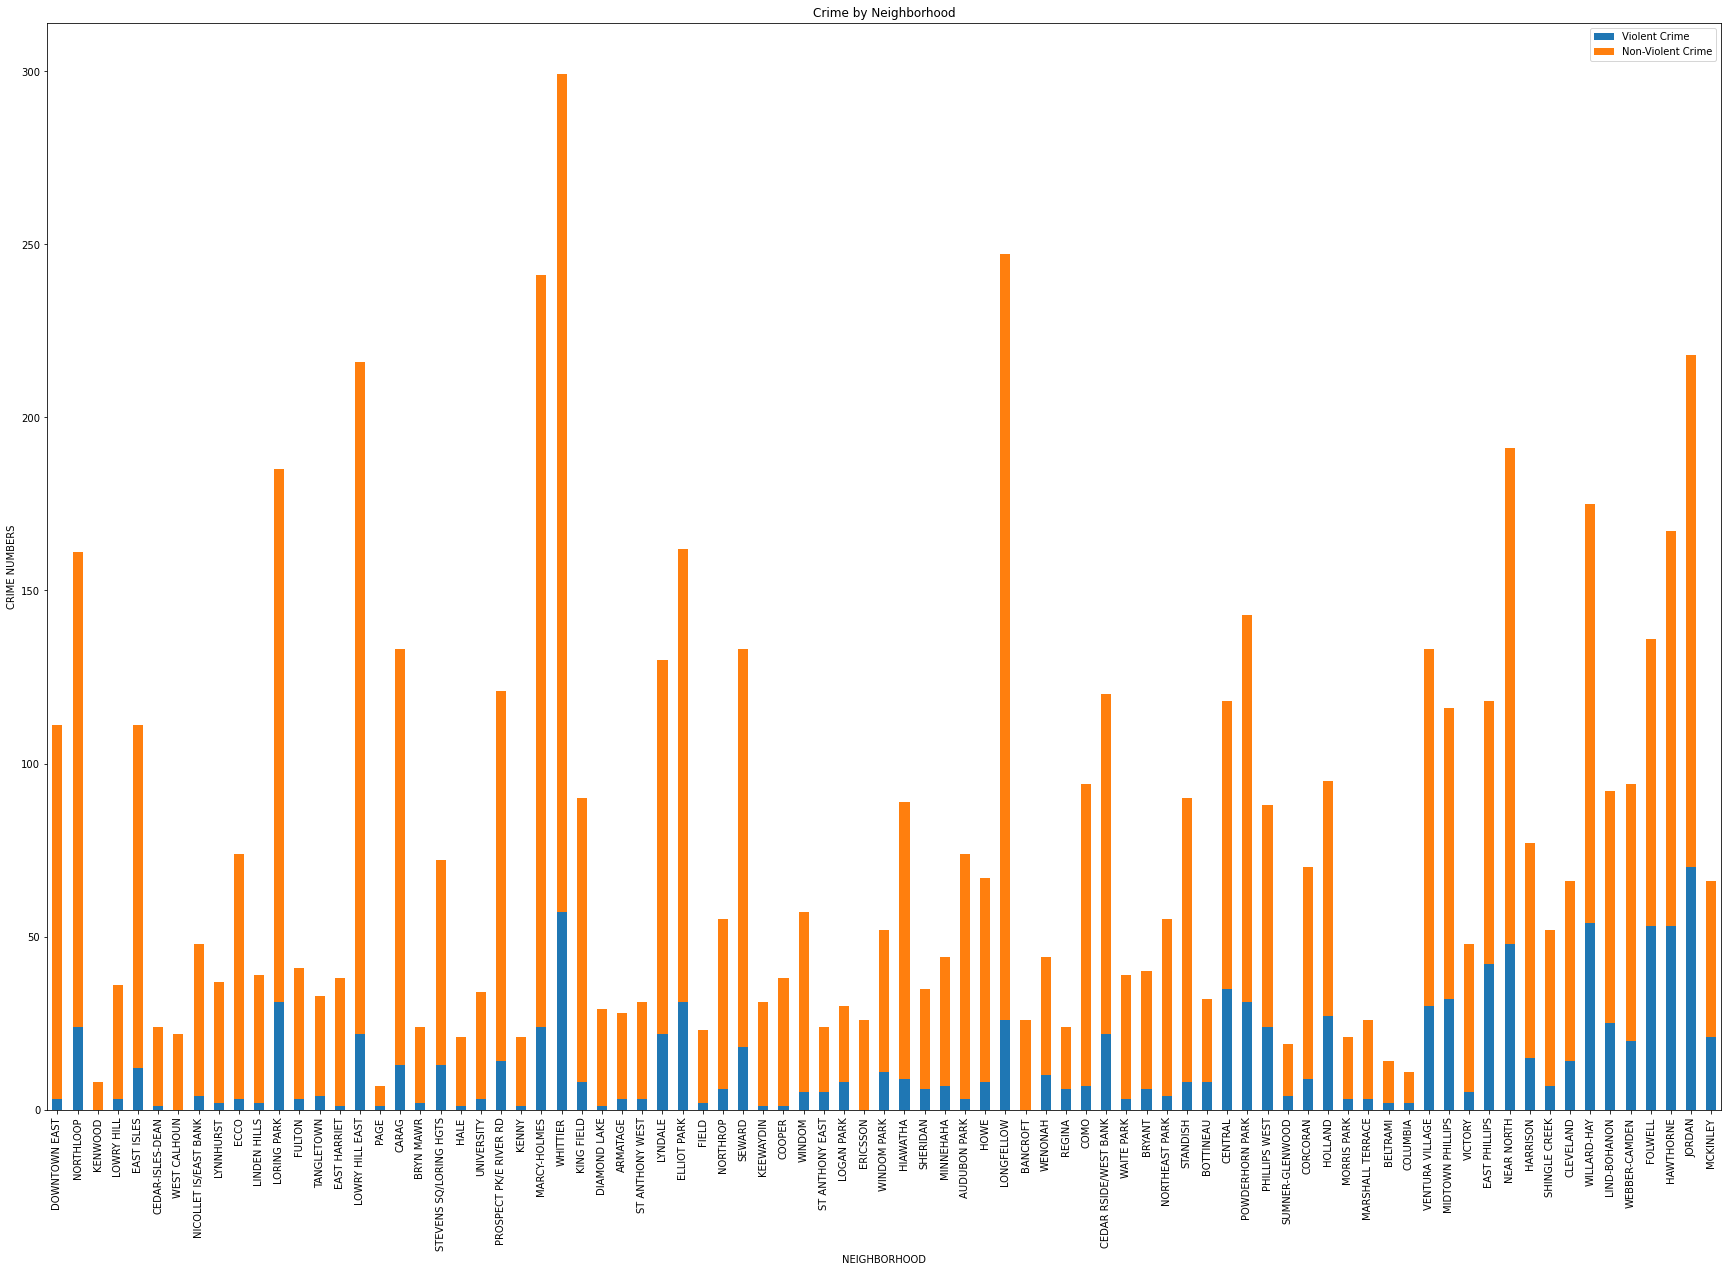

In [28]:
# 2017 Crime (Violent/Non-Violent) by Neighborhood - sorted by Value
#Sort by Median Home Value 
medhome_crime_2017_sort = medhome_crime_2017.sort_values(by="Median Home Value", ascending=False)
# Plot using bar graph
crime_bar_2017 = medhome_crime_2017_sort.plot(kind='bar', x='NEIGHBORHOOD', y=['Violent Crime', 'Non-Violent Crime'], stacked=True, figsize=(30,20), title="Crime by Neighborhood")
plt.ylabel("CRIME NUMBERS")


# FINDING QUARTILES FOR HYPOTHESIS TESTING

In [29]:
# Box Plot to find quartiles for hypothesis testing
# Put the three years into a list that can be iterated over in a for-loop 
# (and later used for plot labels)

years = [2017, 2018, 2019]

# Create empty list to fill with housing data

home_value_list =[]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for year in years:
    # Locate the rows which contain home values for each year and get the total value
    # Find using .loc to match year from list - then find total value
    total_value = parcel_df.loc[parcel_df["ASSESSMENT_YEAR"] == year, "TOTALVALUE"]
    
    # add subset - #append the total value to a list
    home_value_list.append(total_value)
    
    # Determine outliers using upper and lower bounds
    # If the data is in a dataframe
    quartiles = total_value.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    #Find outliersby using .loc and an "OR" statement 
    outliers = total_value.loc[(total_value < lower_bound) | (total_value > upper_bound)]
    maxoutlier = outliers.max()
    minoutlier = outliers.min()
    print(f"{year}'s outliers are:")
    print(f"{outliers}")
    print(f"Max outlier is {maxoutlier}")
    print(f"Min outlier is {minoutlier}")
    print(" ")
    
    #Print Quartiles for Hypothesis Testing
    print(f"{year}'s quartiles are:") 
    print(f"{quartiles}") 
    print(" ")

2017's outliers are:
4892      888500
5806      537000
5832      538500
6239      543000
6284      568000
          ...   
86195    1260500
86211     631500
86231     615500
86308     536500
86332     585000
Name: TOTALVALUE, Length: 5909, dtype: int64
Max outlier is 4750000
Min outlier is 534000
 
2017's quartiles are:
0.25    168500.0
0.50    228500.0
0.75    314500.0
Name: TOTALVALUE, dtype: float64
 
2018's outliers are:
87186     1044000
91690      635500
91705      610500
91942      622500
92017      840500
           ...   
173407     646500
173409     630000
173441     656500
173482     658500
173556     595000
Name: TOTALVALUE, Length: 5932, dtype: int64
Max outlier is 5225000
Min outlier is 593000
 
2018's quartiles are:
0.25    186500.0
0.50    253000.0
0.75    349000.0
Name: TOTALVALUE, dtype: float64
 
2019's outliers are:
175812     651000
178174     654500
178189     684000
178240     637000
178268     644500
           ...   
259827     687000
259828    1294500
259830  

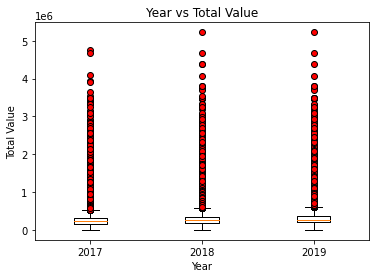

In [30]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
dot_outlier = dict(markerfacecolor='red')

fig1, ax1 = plt.subplots()
ax1.set_title('Year vs Total Value')
ax1.set_ylabel('Total Value')
ax1.set_xlabel('Year')
ax1.boxplot(home_value_list, labels=years, flierprops=dot_outlier)
plt.savefig('boxplot')
plt.show()


In [31]:
#Matt End

In [32]:
#Emilio2 Starts

In [33]:
medhome_crime.head(3)

,NEIGHBORHOOD,Median Home Value,Total Crime,Violent Crime,Non-Violent Crime,Crime Rate (Total),Violent Crime Rate,Non-Violent Crime Rate,Total Population
0,ARMATAGE,315000,207,12,195,4.23,0.25,3.98,4895
1,AUDUBON PARK,242000,375,38,337,7.56,0.77,6.79,4962
2,BANCROFT,240500,315,29,286,9.34,0.86,8.48,3371


In [34]:
pd.qcut(medhome_crime['Median Home Value'], q=5)

0       (284700.0, 387600.0]
1       (236100.0, 284700.0]
2       (236100.0, 284700.0]
3       (203400.0, 236100.0]
4       (203400.0, 236100.0]
               ...          
78     (387600.0, 1305500.0]
79      (284700.0, 387600.0]
80    (108999.999, 203400.0]
81      (236100.0, 284700.0]
82      (236100.0, 284700.0]
Name: Median Home Value, Length: 83, dtype: category
Categories (5, interval[float64]): [(108999.999, 203400.0] < (203400.0, 236100.0] < (236100.0, 284700.0] < (284700.0, 387600.0] < (387600.0, 1305500.0]]

In [35]:
bins = (0, 203400.0, 236100.0, 284700.0, 387600.0, 10000000)
group_labels = ('low', 'mid-low', 'mid', 'mid-high', 'high')
medhome_crime['Distribution'] = pd.cut(medhome_crime['Median Home Value'], bins, labels=group_labels, include_lowest=True)

In [36]:
medhome_crime

,NEIGHBORHOOD,Median Home Value,Total Crime,Violent Crime,Non-Violent Crime,Crime Rate (Total),Violent Crime Rate,Non-Violent Crime Rate,Total Population,Distribution
0,ARMATAGE,315000,207,12,195,4.23,0.25,3.98,4895,mid-high
1,AUDUBON PARK,242000,375,38,337,7.56,0.77,6.79,4962,mid
2,BANCROFT,240500,315,29,286,9.34,0.86,8.48,3371,mid
3,BELTRAMI,204000,135,21,114,10.82,1.68,9.13,1248,mid-low
4,BOTTINEAU,216250,173,26,147,10.45,1.57,8.88,1656,mid-low
...,...,...,...,...,...,...,...,...,...,...
78,WEST CALHOUN,634500,219,17,202,12.59,0.98,11.61,1740,high
79,WHITTIER,322500,2395,378,2017,17.50,2.76,14.73,13689,mid-high
80,WILLARD-HAY,142000,976,352,624,11.33,4.09,7.25,8611,low
81,WINDOM,280000,409,42,367,8.21,0.84,7.37,4980,mid


In [37]:
medhome_crime_dist = medhome_crime[['Median Home Value', 'Crime Rate (Total)', 'Violent Crime Rate', 'Non-Violent Crime Rate', 'Distribution']].groupby(['Distribution']).mean()
medhome_crime_dist = medhome_crime_dist.rename(columns={'Median Home Value':'Mean of Median Property Value'})
medhome_crime_dist

,Mean of Median Property Value,Crime Rate (Total),Violent Crime Rate,Non-Violent Crime Rate
Distribution,,,,
low,155764.705882,14.470588,4.231765,10.238235
mid-low,218359.375000,13.396250,1.949375,11.446250
mid,258297.058824,10.192941,0.984706,9.210000
mid-high,326859.375000,9.943125,1.240625,8.701250
high,637044.117647,14.528824,1.092941,13.437059


In [38]:
population1 = medhome_crime[medhome_crime['Distribution'] == 'low']['Total Crime']
population2 = medhome_crime[medhome_crime['Distribution'] == 'mid-low']['Total Crime']
population3 = medhome_crime[medhome_crime['Distribution'] == 'mid']['Total Crime']
population4 = medhome_crime[medhome_crime['Distribution'] == 'mid-high']['Total Crime']
population5 = medhome_crime[medhome_crime['Distribution'] == 'high']['Total Crime']

In [39]:
# Calculate Independent (Two Sample) t-test
st.ttest_ind(population1, population5, equal_var=False)

Ttest_indResult(statistic=1.4795039027172077, pvalue=0.14881721704884313)

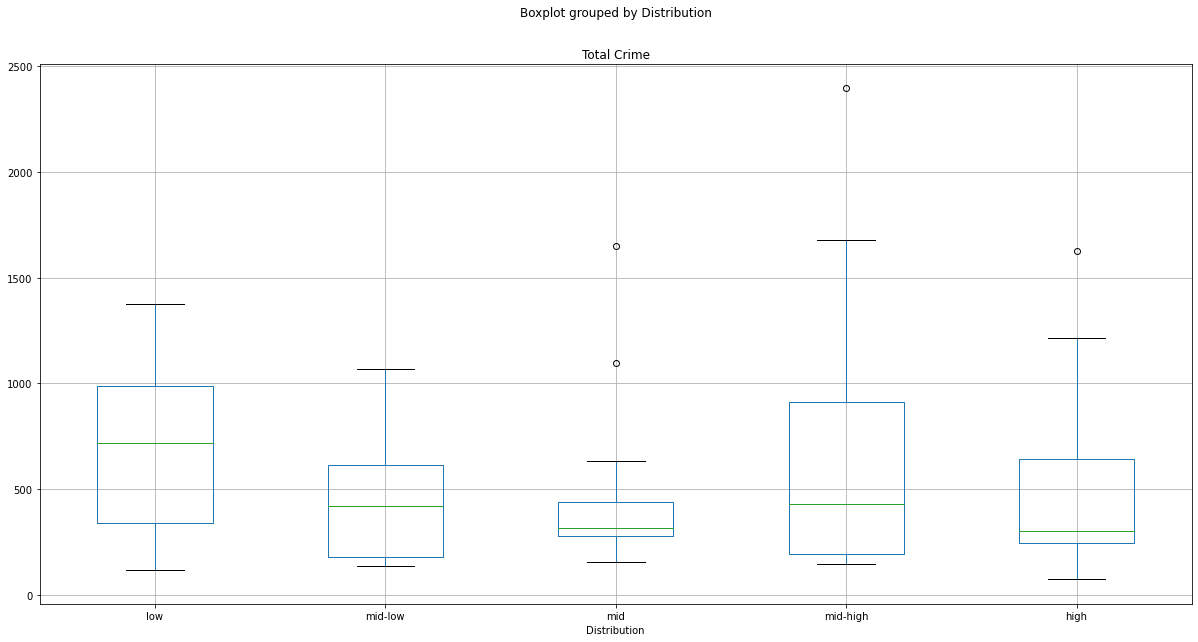

In [40]:
medhome_crime.boxplot("Total Crime", by="Distribution", figsize=(20, 10))

In [41]:
 # Perform the ANOVA
crime1 = medhome_crime[medhome_crime['Distribution'] == 'low']['Total Crime']
crime2 = medhome_crime[medhome_crime['Distribution'] == 'mid-low']['Total Crime']
crime3 = medhome_crime[medhome_crime['Distribution'] == 'mid']['Total Crime']
crime4 = medhome_crime[medhome_crime['Distribution'] == 'mid-high']['Total Crime']
crime5 = medhome_crime[medhome_crime['Distribution'] == 'high']['Total Crime']

st.f_oneway(crime1, crime2, crime3, crime4, crime5)

F_onewayResult(statistic=1.1488786882976478, pvalue=0.3399654139703095)

# Other charts

In [42]:
# Pie charts
pie_crime_values = medhome_crime[['Total Crime', 'Violent Crime', 'Non-Violent Crime', 'Distribution']].groupby(['Distribution']).sum()
pie_crime_norm = medhome_crime[['Crime Rate (Total)', 'Violent Crime Rate', 'Non-Violent Crime Rate', 'Distribution']].groupby(['Distribution']).sum()
pie_crime_norm

,Crime Rate (Total),Violent Crime Rate,Non-Violent Crime Rate
Distribution,,,
low,246.00,71.94,174.05
mid-low,214.34,31.19,183.14
mid,173.28,16.74,156.57
mid-high,159.09,19.85,139.22
high,246.99,18.58,228.43


In [43]:
pie_crime_values

,Total Crime,Violent Crime,Non-Violent Crime
Distribution,,,
low,12005,3657,8348
mid-low,7509,1346,6163
mid,7811,756,7055
mid-high,10604,1386,9218
high,8381,733,7648


In [44]:
crime_df

,Unnamed: 0,NEIGHBORHOOD,OFFENSE,DESCRIPTION,UCRCode_x,YEAR,MONTH,UCRCode_y,CATEGORY
0,0,HAWTHORNE,AUTOTH,Motor Vehicle Theft,8,2017,8,8,Non-Violent
1,1,FOLWELL,THEFT,Other Theft,7,2017,8,7,Non-Violent
2,2,JORDAN,ROBPAG,Robbery Per Agg,4,2017,8,4,Violent
3,3,EAST PHILLIPS,SHOPLF,Shoplifting,7,2017,8,7,Non-Violent
4,4,WILLARD-HAY,THEFT,Other Theft,7,2017,8,7,Non-Violent
...,...,...,...,...,...,...,...,...,...
46305,52134,LORING PARK,AUTOTH,AUTOMOBILE THEFT,8,2019,2,8,Non-Violent
46306,52135,CARAG,AUTOTH,AUTOMOBILE THEFT,8,2019,2,8,Non-Violent
46307,52138,HAWTHORNE,ASLT2,ASSLT W/DNGRS WEAPON,5,2019,2,5,Violent
46308,52139,POWDERHORN PARK,AUTOTH,AUTOMOBILE THEFT,8,2019,2,8,Non-Violent


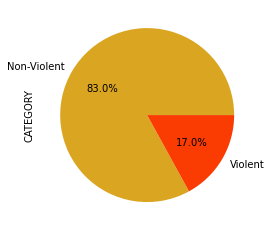

In [45]:
colors = ['#DAA520', '#FA3B02']
grouped_category = crime_df.groupby('CATEGORY')
category_count = grouped_category['CATEGORY'].count()
crime_pie = category_count.plot(kind='pie', y='CATEGORY', subplots=True, autopct='%1.1f%%', colors=colors)

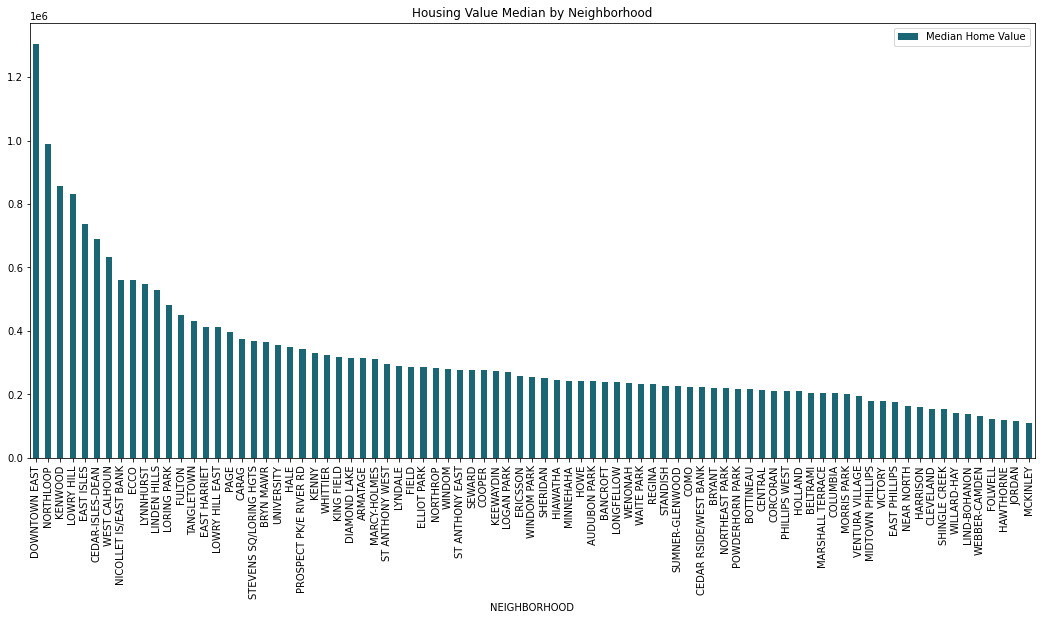

In [46]:
medhome_crime_sorted = medhome_crime.sort_values(by='Median Home Value', ascending=False)
median_plot = medhome_crime_sorted.plot(kind='bar', x='NEIGHBORHOOD', y='Median Home Value', figsize=(18,8), 
                                          title='Housing Value Median by Neighborhood', color='#1A6675')
plt.title

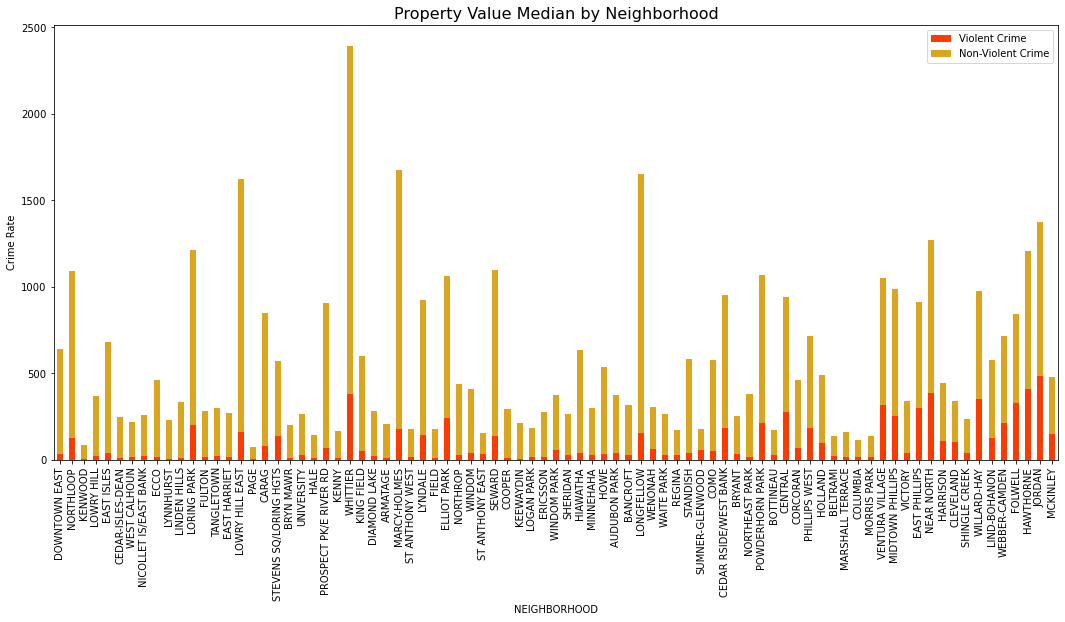

In [51]:
colors_bar = ['#FA3B02', '#DAA520']
total_crime_plot = medhome_crime_sorted.plot(kind='bar', x='NEIGHBORHOOD', y=['Violent Crime', 'Non-Violent Crime'], figsize=(18,8), 
                                          stacked=True, color=colors_bar)
plt.title('Property Value Median by Neighborhood', fontsize=16)
plt.ylabel('Crime Rate')
plt.show()

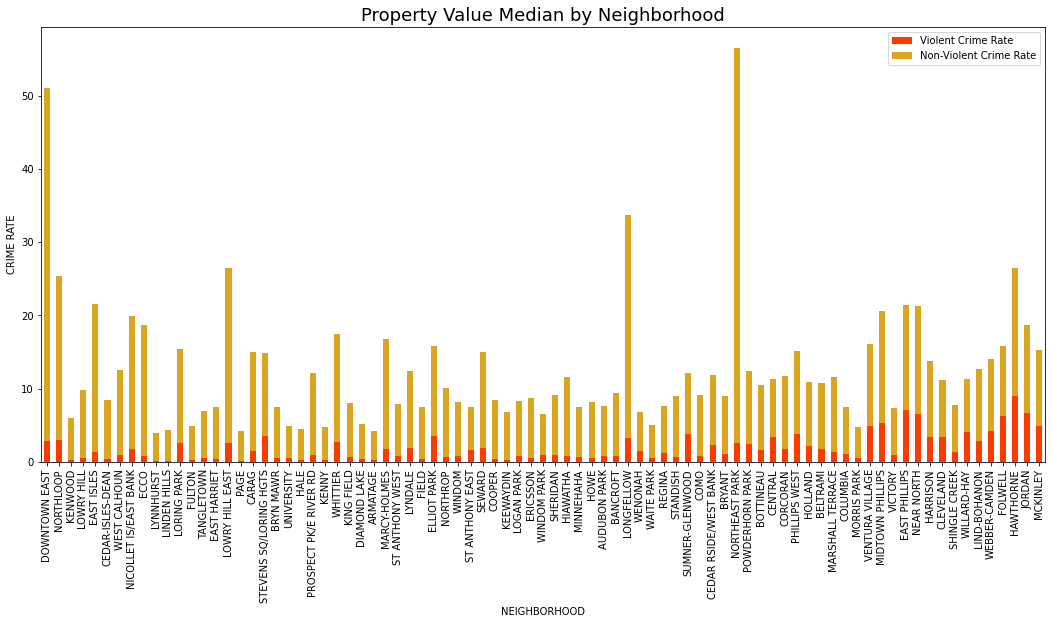

In [50]:
rate_crime_plot = medhome_crime_sorted.plot(kind='bar', x='NEIGHBORHOOD', y=['Violent Crime Rate', 'Non-Violent Crime Rate'], figsize=(18,8), 
                                          title='Housing Value Median by Neighborhood', stacked=True, color=colors_bar)
plt.title('Property Value Median by Neighborhood', fontsize=18)
plt.ylabel('CRIME RATE')
plt.show()

In [ ]:
#Emilio2 Ends